# TP4 | INF8808

In this notebook, we will start by creating a simple app to help explore our data. This step is important in conceiving data visualizations. It helps to determine which type of data visualization is appropriate for our data set, as well as which features we'd like to include. 

In the rest of this notebook, you will have to complete some cells to prepare for the implementation of an animated bubble chart in the next steps. 

To begin, take a look at the following cells, where we complete the necessary imports and load the data.



In [21]:
import pandas as pd
import json

In [22]:
with open('../src/assets/data/countriesData.json') as data_file:    
    data = json.load(data_file)  

df_2000 = pd.json_normalize(data, '2000')
df_2015 = pd.json_normalize(data, '2015')

In [23]:
from jupyter_dash import JupyterDash
import dash
import dash_html_components as html
import dash_core_components as dcc

import plotly.express as px

In [24]:
external_stylesheets=['https://codepen.io/chriddyp/pen/bWLwgP.css']

In [25]:
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

In [26]:
df_2000

,Country Name,GDP,CO2,Population,Continent
0,Algeria,1764.973830,2.830380,31042235,Africa
1,Andorra,21854.246803,8.019284,65390,Europe
2,Angola,556.836318,0.581961,16395473,Africa
3,Albania,1126.683318,0.978175,3089027,Europe
4,Antigua and Barbuda,10920.842688,4.534545,76016,North America
...,...,...,...,...,...
169,Vanuatu,1470.572265,0.455966,184972,Oceania
170,Vietnam,390.093326,0.671309,79910412,Asia
171,Yemen,554.448633,0.841075,17409072,Asia
172,Zambia,345.689554,0.174972,10415944,Africa


In [27]:
df_2015

,Country Name,GDP,CO2,Population,Continent
0,Albania,3952.801215,1.602648,2880703,Europe
1,Algeria,4177.892515,3.854557,39728025,Africa
2,Andorra,35762.523074,5.969786,78011,Europe
3,Angola,4166.979684,1.240245,27884381,Africa
4,Antigua and Barbuda,14286.093160,5.839546,93566,North America
...,...,...,...,...,...
169,Vanuatu,2801.939848,0.486896,271130,Oceania
170,Vietnam,2085.101484,2.032108,92677076,Asia
171,Yemen,1395.439633,0.497091,26497889,Asia
172,Zambia,1337.796110,0.285428,15879361,Africa


# Question 1 

You notice that the tables `df_2000` and `df_2015` have columns `GDP` and `CO2`, which you wish to include in your visualization. 

These columns contain numbers with many decimal places, but you are only planning on displaying numbers up to two decimal places in your visualization. 

Round the numbers in these dataframes so they only contain numbers up to two decimal places.

In [28]:
# TODO : Round the values
df_2000 = df_2000.round(2)
df_2015 = df_2015.round(2)

In [29]:
# Use this cell to check your answer
df_2000

,Country Name,GDP,CO2,Population,Continent
0,Algeria,1764.97,2.83,31042235,Africa
1,Andorra,21854.25,8.02,65390,Europe
2,Angola,556.84,0.58,16395473,Africa
3,Albania,1126.68,0.98,3089027,Europe
4,Antigua and Barbuda,10920.84,4.53,76016,North America
...,...,...,...,...,...
169,Vanuatu,1470.57,0.46,184972,Oceania
170,Vietnam,390.09,0.67,79910412,Asia
171,Yemen,554.45,0.84,17409072,Asia
172,Zambia,345.69,0.17,10415944,Africa


In [30]:
# Use this cell to check your answer
df_2015

,Country Name,GDP,CO2,Population,Continent
0,Albania,3952.80,1.60,2880703,Europe
1,Algeria,4177.89,3.85,39728025,Africa
2,Andorra,35762.52,5.97,78011,Europe
3,Angola,4166.98,1.24,27884381,Africa
4,Antigua and Barbuda,14286.09,5.84,93566,North America
...,...,...,...,...,...
169,Vanuatu,2801.94,0.49,271130,Oceania
170,Vietnam,2085.10,2.03,92677076,Asia
171,Yemen,1395.44,0.50,26497889,Asia
172,Zambia,1337.80,0.29,15879361,Africa


# Question 2

Given the data you have, you decide to create a simple scatter plot for each dataframe.

In the next cells, fill the functions to accomplish this task. 

### 2.1

First, fill the `get_scatter` function, which returns a scatter plot figure for the given data frame. Its x axis is GDP and its y axis is CO2. Its `hover_name` property is represented by the country name. The title of the scatter plot is passed as argument. The axes should be represented as linearly scaled.

### 2.2

Second, fill the `get_range` function, which will help to more easily compare the two scatter plots. We want both scatter plots to have the same range for their x and y axes, and to be able to see all the points in each scatter plot. Thus, for the given column, the function should return an array containing the minimum and maximum across the two dataframes. 



In [31]:
def get_scatter(df, title):
    # TODO : Construct the scatter plot
    fig = px.scatter(df, x='GDP', y='CO2',hover_name = df['Country Name'], title = title, 
                    labels = dict(x = 'GDP', y = 'CO2'))
    return fig

In [32]:
def get_range(col, df1, df2):
    # TODO : Calculate the range
    minDF1 = df1[col].min()
    maxDF1 = df1[col].max()
    minDF2 = df2[col].min()
    maxDF2 = df2[col].max()      
    return min(minDF1, minDF2), max(maxDF1, maxDF2)

Run these next three cells to check your answer. You should see your two scatter plots side by side.

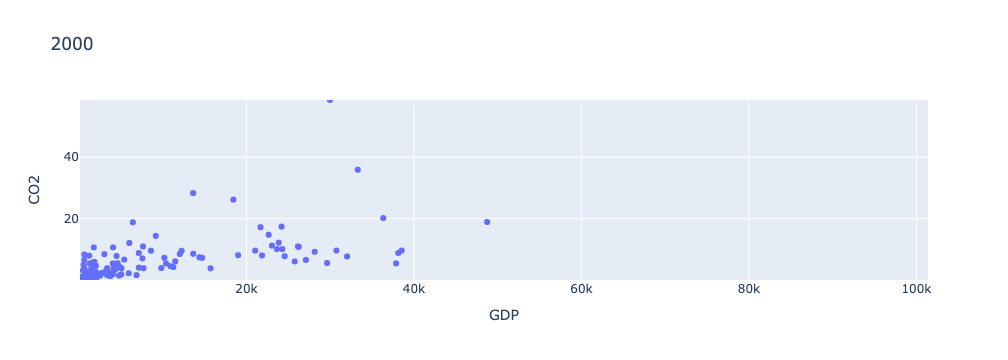

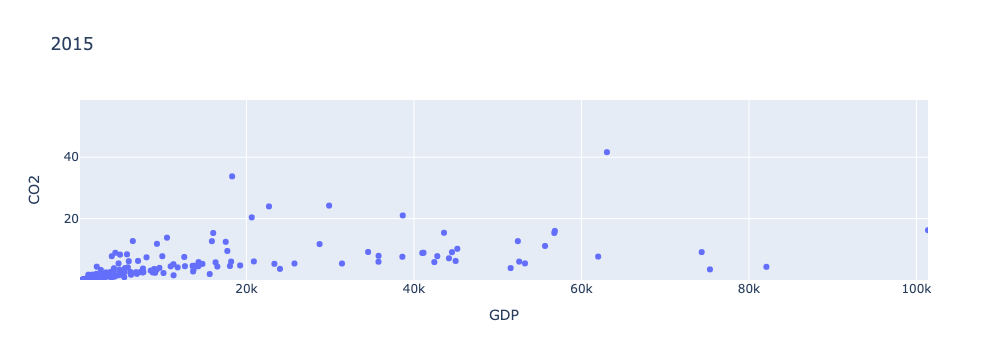

In [33]:
fig_2000 = get_scatter(df_2000, '2000')
fig_2015 = get_scatter(df_2015, '2015')

fig_2000.update_layout(xaxis=dict(range=get_range('GDP', df_2000, df_2015)))
fig_2000.update_layout(yaxis=dict(range=get_range('CO2', df_2000, df_2015)))
fig_2000.update_layout(dragmode=False)
fig_2000.show()

fig_2015.update_layout(xaxis=dict(range=get_range('GDP', df_2000, df_2015)))
fig_2015.update_layout(yaxis=dict(range=get_range('CO2', df_2000, df_2015)))
fig_2015.update_layout(dragmode=False);
fig_2015.show()

In [34]:
config=dict(
                scrollZoom=False,
                showTips=False,
                showAxisDragHandles=False,
                doubleClick=False,
                displayModeBar=False
            )

app.layout = html.Div(children=[
        html.Div(className='row', children=[dcc.Graph(id='fig-2000', figure=fig_2000, className='six columns', config=config), dcc.Graph(id='fig-2015', figure=fig_2015, className='six columns', config=config)]),
        html.Div(style = {'width': '100%', 'display': 'flex', 'alignItems': 'center', 'justifyContent': 'center', 'flexDirection' : 'column'}, children=[
            html.H4('Hover over markers for more information', id='country'),
            html.Table(children=[
                html.Thead(html.Tr(children=[html.Th(), html.Th('GDP per capita ($ USD)'), html.Th('CO2 emissions per capita (metric tonnes)')])),
                html.Tbody(children=[
                    html.Tr(children=[html.Th('2000'), html.Td(id='2000-gdp'), html.Td(id='2000-co2')]),
                    html.Tr(children=[html.Th('2015'), html.Td(id='2015-gdp'), html.Td(id='2015-co2')])
                ])
            ])
        ])
    ])

In [35]:
# Use this cell to check your answer
app.run_server(port=8051)

Dash app running on http://127.0.0.1:8051/


# Question 3

Now that you've seen both charts side-by-side, you've realized it might be interesting to model them with an animation. However, you'd like to be able to compare the data for countries more easily across the scatter plots.

To do so, you will implement a callback function which is triggered whenever a point is hovered in one of the two scatter plots. The signature for this function is already started below. 

Complete the function so that whenever a point is hovered, the appropriate information is displayed in the table below the scatter plots. 

The title of the table should be the name of the country of the hovered point. Further, the table should contain the GDP and CO2 information for the years 2000 and 2015.

In [36]:
from dash.dependencies import Input, Output, State

In [39]:
@app.callback(
    [Output('country', 'children'), Output('2000-gdp', 'children'), Output('2000-co2', 'children'), Output('2015-gdp', 'children'), Output('2015-co2', 'children')],
    [Input('fig-2000', 'hoverData'), Input('fig-2015', 'hoverData')],
    [State('country', 'children'), State('2000-gdp', 'children'), State('2000-co2', 'children'), State('2015-gdp', 'children'), State('2015-co2', 'children')])
def display_selected_data(hoverData2000, hoverData2015, prevCountry, prevgdp0, prevco20, prevgdp5, prevco25):
    # TODO : Handle the display when a point is hovered
    country = prevCountry
    gdp0 = prevgdp0
    co20 = prevco20
    gdp5 = prevgdp5
    co25 = prevco25

    yearSelected = 'NaN'

    if (hoverData2000 and hoverData2000['points'][0]['hovertext'] != prevCountry
            and prevgdp0 != hoverData2000['points'][0]['x'] 
            and prevco20 != hoverData2000['points'][0]['y']):
        yearSelected = '2000'
    elif (hoverData2015 and hoverData2015['points'][0]['hovertext'] != prevCountry
            and prevgdp5 != hoverData2015['points'][0]['x'] 
            and prevco25 != hoverData2015['points'][0]['y']):
        yearSelected = '2015'
    
    if (yearSelected == '2000'):
        country = hoverData2000['points'][0]['hovertext']
        gdp0 = hoverData2000['points'][0]['x']
        co20 = hoverData2000['points'][0]['y']
    elif (yearSelected == '2015'):
        country = hoverData2015['points'][0]['hovertext']
        gdp5 = hoverData2015['points'][0]['x']
        co25 = hoverData2015['points'][0]['y']

    return country, gdp0, co20, gdp5, co25
        
    

Run these next three cells to check your answer. You should see the table get filled when you hover a point in either scatter plot.

In [40]:
# Use this cell to check your answer
app.run_server(port=8052)

Dash app running on http://127.0.0.1:8052/


# Next steps

After this initial exploration step, you've decided you would like to implement this data visualization as a bubble chart with an animation to transition between the two years. You also would like to change the axes display to be log-scaled. You will reuse some of this code and complete the rest of the code provided with this TP to make these changes.